In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [5]:
data.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [6]:
data.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [7]:
correlation = data.corr()

In [8]:
correlation

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,1.000000,0.004305,-0.741200,0.558881,-0.253626,0.400206,0.000128,-0.005923,0.011313,-0.007001,...,0.001550,-0.029611,0.009524,-0.151220,-0.037559,-0.053744,0.083951,-0.059849,-0.000983,-0.007545
loading,0.004305,1.000000,-0.008208,-0.000756,-0.005578,0.002532,0.000303,-0.005203,-0.011792,-0.005599,...,-0.007751,-0.007525,0.003594,-0.002407,0.006138,0.000120,-0.008087,-0.000633,0.000305,0.129089
attribute_2,-0.741200,-0.008208,1.000000,-0.538697,0.175387,-0.377971,0.030522,0.005849,-0.011797,0.006811,...,-0.000098,-0.004953,0.094038,0.226756,0.049639,0.020921,-0.161242,0.035795,0.004729,0.006337
attribute_3,0.558881,-0.000756,-0.538697,1.000000,-0.370232,0.329233,0.013258,-0.002265,0.015470,-0.004034,...,-0.002295,-0.100845,-0.025434,-0.132060,0.028472,-0.049711,0.187519,-0.061520,-0.001418,-0.019222
measurement_0,-0.253626,-0.005578,0.175387,-0.370232,1.000000,-0.255255,-0.083813,-0.004890,-0.006459,0.003304,...,0.009112,0.032779,0.001878,0.033496,-0.031527,0.021907,-0.055431,0.003025,0.003351,0.009646
measurement_1,0.400206,0.002532,-0.377971,0.329233,-0.255255,1.000000,0.005032,-0.008363,0.001535,-0.005587,...,0.004529,0.011986,-0.035312,-0.084605,0.007523,-0.011471,0.060870,-0.004509,-0.004651,-0.010810
measurement_2,0.000128,0.000303,0.030522,0.013258,-0.083813,0.005032,1.000000,-0.002751,-0.009797,0.000241,...,0.001884,0.018695,-0.003877,-0.001808,0.029145,0.014623,0.000138,0.033088,-0.009596,0.015808
measurement_3,-0.005923,-0.005203,0.005849,-0.002265,-0.004890,-0.008363,-0.002751,1.000000,0.009573,0.009864,...,0.008195,-0.004854,-0.004427,0.002445,0.005893,0.002150,-0.010986,-0.002164,0.080902,0.003577
measurement_4,0.011313,-0.011792,-0.011797,0.015470,-0.006459,0.001535,-0.009797,0.009573,1.000000,0.005113,...,0.009080,-0.012998,-0.002784,-0.002586,-0.002454,-0.001713,-0.004567,0.002929,0.193045,-0.010488
measurement_5,-0.007001,-0.005599,0.006811,-0.004034,0.003304,-0.005587,0.000241,0.009864,0.005113,1.000000,...,-0.003589,0.002170,0.005306,0.000858,-0.009325,0.008720,-0.009101,-0.002996,0.450024,0.018079


<AxesSubplot:>

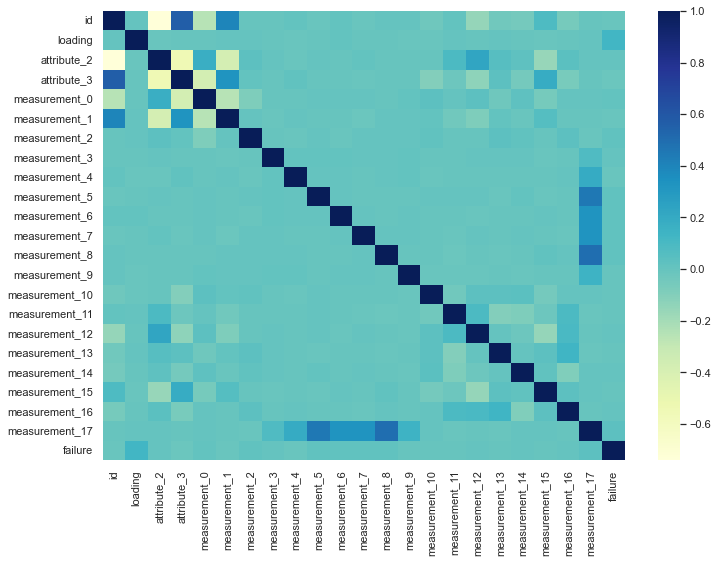

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation,cmap="YlGnBu")

In [10]:
data.nunique()

id                26570
product_code          5
loading           11950
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
measurement_0        29
measurement_1        30
measurement_2        25
measurement_3      4721
measurement_4      4692
measurement_5      4671
measurement_6      4704
measurement_7      4734
measurement_8      4713
measurement_9      4708
measurement_10     6177
measurement_11     6526
measurement_12     6392
measurement_13     5271
measurement_14     6389
measurement_15     6577
measurement_16     7035
measurement_17    23612
failure               2
dtype: int64

In [11]:
# sns.pairplot(data)

<AxesSubplot:xlabel='loading', ylabel='failure'>

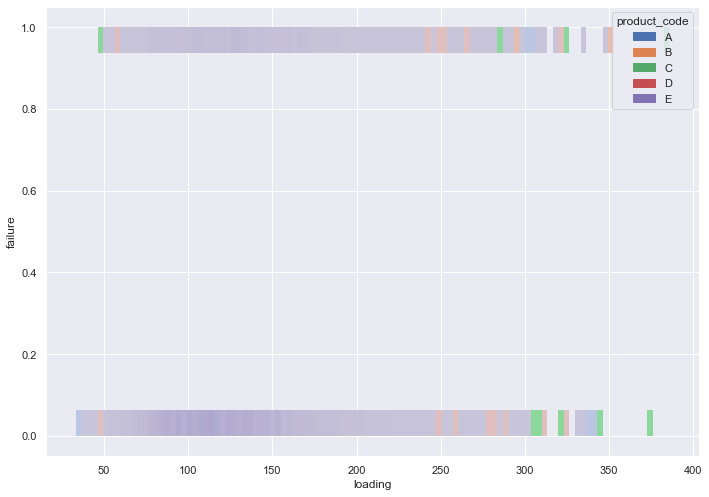

In [12]:
sns.histplot(x=data["loading"],y=data['failure'],hue=data["product_code"])

In [13]:
data['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [14]:
test = pd.read_csv("test.csv")

In [15]:
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [16]:
test.nunique()

id                20775
product_code          4
loading           10741
attribute_0           2
attribute_1           3
attribute_2           3
attribute_3           4
measurement_0        30
measurement_1        33
measurement_2        28
measurement_3      4487
measurement_4      4514
measurement_5      4500
measurement_6      4476
measurement_7      4493
measurement_8      4513
measurement_9      4471
measurement_10     6217
measurement_11     6252
measurement_12     5623
measurement_13     5644
measurement_14     5795
measurement_15     6156
measurement_16     6396
measurement_17    18657
dtype: int64

In [17]:
test['product_code'].value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

In [18]:
data['product_code'].value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

In [19]:
test['attribute_0'].value_counts()

material_5    10529
material_7    10246
Name: attribute_0, dtype: int64

In [20]:
data['attribute_0'].value_counts()

material_7    21320
material_5     5250
Name: attribute_0, dtype: int64

In [21]:
test['attribute_1'].value_counts()

material_6    10529
material_5     5228
material_7     5018
Name: attribute_1, dtype: int64

In [22]:
data['attribute_1'].value_counts()

material_8    10865
material_5    10362
material_6     5343
Name: attribute_1, dtype: int64

In [23]:
measurement_cols = [f for f in data.columns if "measurement" in f]
float_ms_data = [f for f in measurement_cols if data[f].dtype == float]
int_ms_data = [f for f in measurement_cols if data[f].dtype == 'int64']

attribute_cols = [f for f in data.columns if "attribute" in f]
int_attribute_cols = [f for f in attribute_cols if data[f].dtype == int]

In [24]:
data["measurement_0"].dtype

dtype('int64')

<AxesSubplot:>

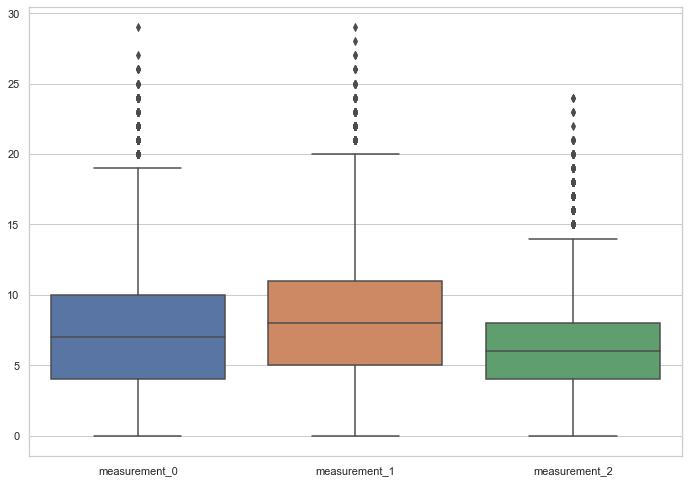

In [25]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=data[int_ms_data])

<AxesSubplot:>

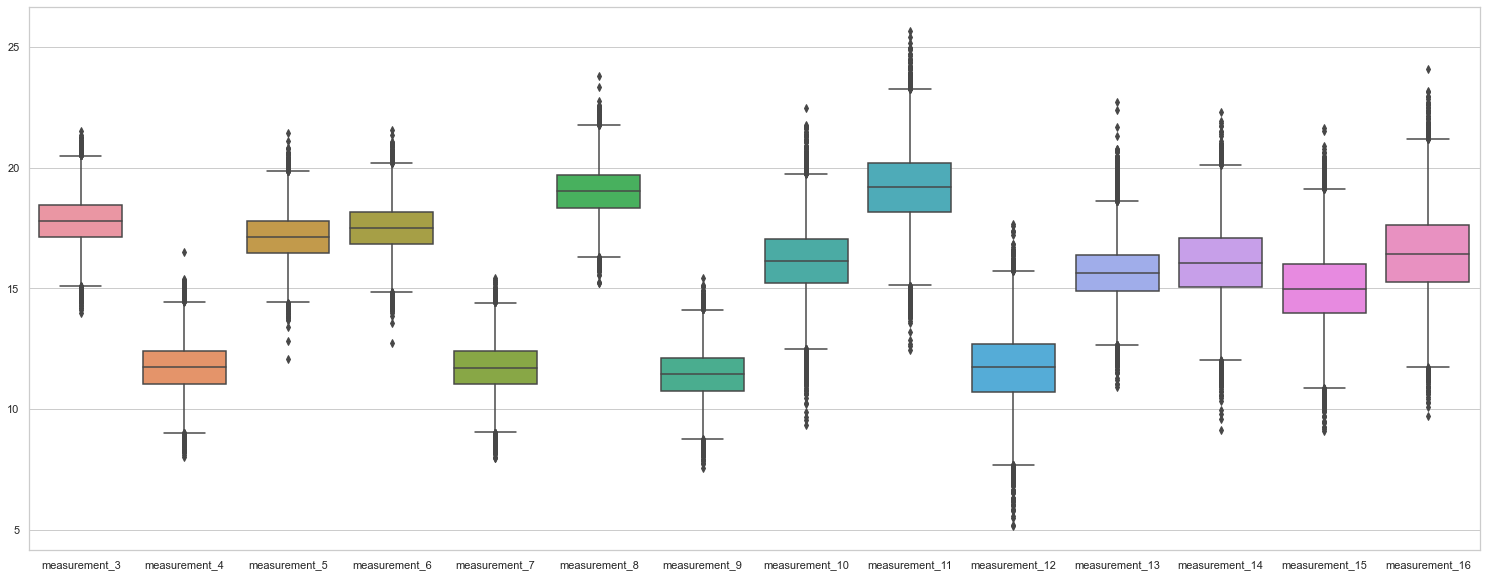

In [26]:
plt.figure(figsize=(26,10))
sns.boxplot(data=data[float_ms_data].drop('measurement_17',axis=1))

<AxesSubplot:>

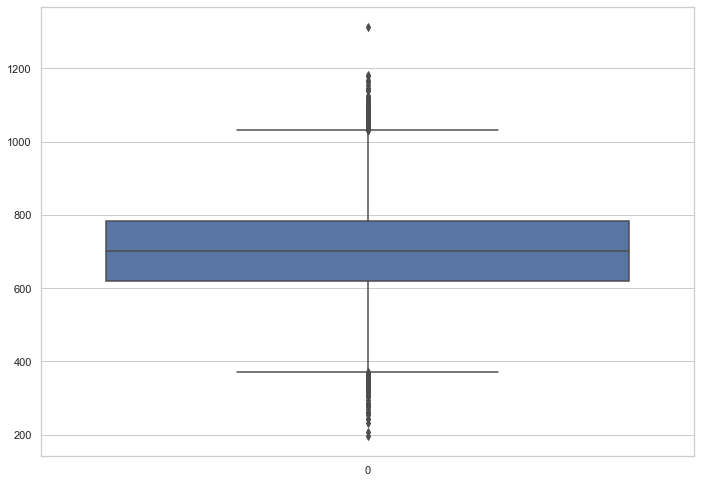

In [27]:
sns.boxplot(data=data['measurement_17'])

In [28]:
def outlier_remove(col):
    Q3, Q1 = np.nanpercentile(col, [75, 25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR 
    col = np.where((col > UL) | (col < LL), np.nan, col)
    return col

In [29]:
 for column in data[measurement_cols]:
    data[column] = outlier_remove(data[column])
 for column in data[int_attribute_cols]:
    data[column] = outlier_remove(data[column])
data["loading"] = outlier_remove(data["loading"])

In [30]:
data.isnull().sum()

id                   0
product_code         0
loading            839
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0      224
measurement_1      165
measurement_2      390
measurement_3      546
measurement_4      705
measurement_5      814
measurement_6      988
measurement_7     1135
measurement_8     1201
measurement_9     1420
measurement_10    1684
measurement_11    1708
measurement_12    1784
measurement_13    2151
measurement_14    2065
measurement_15    2225
measurement_16    2267
measurement_17    2482
failure              0
dtype: int64

In [31]:
from fancyimpute import KNN, IterativeImputer

In [32]:
data = data.drop("product_code",axis=1)
test = test.drop("product_code",axis=1)

In [33]:
data = pd.get_dummies(data,drop_first = True)

In [34]:
data

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,attribute_0_material_7,attribute_1_material_6,attribute_1_material_8
0,0,80.10,9,5,7.0,8.0,4.0,18.040,12.518,15.748,...,15.193,15.029,NaN,13.034,14.684,764.100,0,1,0,1
1,1,84.89,9,5,14.0,3.0,3.0,18.213,11.540,17.717,...,11.755,14.732,15.425,14.395,15.631,682.057,0,1,0,1
2,2,82.43,9,5,12.0,1.0,5.0,18.057,11.652,16.738,...,13.798,16.711,18.631,14.094,17.946,663.376,0,1,0,1
3,3,101.07,9,5,13.0,2.0,6.0,17.295,11.188,18.576,...,10.020,15.250,15.562,16.154,17.172,826.282,0,1,0,1
4,4,188.06,9,5,9.0,2.0,8.0,19.346,12.950,16.990,...,12.428,16.182,12.760,13.153,16.412,579.885,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,158.95,6,9,6.0,16.0,4.0,16.301,13.259,18.068,...,10.112,15.795,18.572,16.144,NaN,729.131,0,1,1,0
26566,26566,146.02,6,9,10.0,12.0,8.0,17.543,NaN,17.984,...,10.234,14.450,14.322,13.146,16.471,853.924,0,1,1,0
26567,26567,115.62,6,9,1.0,10.0,1.0,15.670,11.535,16.778,...,8.668,15.069,16.599,15.590,14.065,750.364,0,1,1,0
26568,26568,106.38,6,9,2.0,9.0,4.0,18.059,NaN,16.918,...,14.928,16.273,15.485,13.624,12.865,730.156,0,1,1,0


In [35]:
knn = KNN()

In [36]:
df_knn = data.copy(deep=True)

In [37]:
df_knn.iloc[:, :] = knn.fit_transform(df_knn)

Imputing row 1/26570 with 1 missing, elapsed time: 160.348
Imputing row 101/26570 with 2 missing, elapsed time: 160.519
Imputing row 201/26570 with 1 missing, elapsed time: 160.589
Imputing row 301/26570 with 1 missing, elapsed time: 160.659
Imputing row 401/26570 with 0 missing, elapsed time: 160.668
Imputing row 501/26570 with 0 missing, elapsed time: 160.689
Imputing row 601/26570 with 2 missing, elapsed time: 160.698
Imputing row 701/26570 with 0 missing, elapsed time: 160.719
Imputing row 801/26570 with 1 missing, elapsed time: 160.749
Imputing row 901/26570 with 0 missing, elapsed time: 160.833
Imputing row 1001/26570 with 2 missing, elapsed time: 160.947
Imputing row 1101/26570 with 0 missing, elapsed time: 161.048
Imputing row 1201/26570 with 1 missing, elapsed time: 161.109
Imputing row 1301/26570 with 2 missing, elapsed time: 161.139
Imputing row 1401/26570 with 1 missing, elapsed time: 161.169
Imputing row 1501/26570 with 1 missing, elapsed time: 161.195
Imputing row 1601/26

In [38]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      26570 non-null  float64
 1   loading                 26570 non-null  float64
 2   attribute_2             26570 non-null  float64
 3   attribute_3             26570 non-null  float64
 4   measurement_0           26570 non-null  float64
 5   measurement_1           26570 non-null  float64
 6   measurement_2           26570 non-null  float64
 7   measurement_3           26570 non-null  float64
 8   measurement_4           26570 non-null  float64
 9   measurement_5           26570 non-null  float64
 10  measurement_6           26570 non-null  float64
 11  measurement_7           26570 non-null  float64
 12  measurement_8           26570 non-null  float64
 13  measurement_9           26570 non-null  float64
 14  measurement_10          26570 non-null

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      26570 non-null  int64  
 1   loading                 25731 non-null  float64
 2   attribute_2             26570 non-null  int64  
 3   attribute_3             26570 non-null  int64  
 4   measurement_0           26346 non-null  float64
 5   measurement_1           26405 non-null  float64
 6   measurement_2           26180 non-null  float64
 7   measurement_3           26024 non-null  float64
 8   measurement_4           25865 non-null  float64
 9   measurement_5           25756 non-null  float64
 10  measurement_6           25582 non-null  float64
 11  measurement_7           25435 non-null  float64
 12  measurement_8           25369 non-null  float64
 13  measurement_9           25150 non-null  float64
 14  measurement_10          24886 non-null

In [40]:
df_knn.corr()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,attribute_0_material_7,attribute_1_material_6,attribute_1_material_8
id,1.000000,0.008676,-0.741200,0.558881,-0.250946,0.404140,-0.008622,-0.006727,0.012841,-0.007235,...,-0.157066,-0.026323,-0.050384,0.086571,-0.055339,-0.000981,-0.007545,0.359716,0.694234,-0.549454
loading,0.008676,1.000000,-0.009542,0.002352,-0.014883,0.005224,-0.001806,-0.003971,-0.009836,-0.004516,...,0.000427,-0.004476,0.002497,-0.003767,-0.001263,-0.004484,0.114972,0.005921,0.003358,-0.004710
attribute_2,-0.741200,-0.009542,1.000000,-0.538697,0.180025,-0.388689,0.036600,0.006295,-0.012301,0.006819,...,0.230172,0.033679,0.020300,-0.158377,0.034314,0.003809,0.006337,-0.420080,-0.257034,0.069816
attribute_3,0.558881,0.002352,-0.538697,1.000000,-0.373961,0.333628,0.002765,-0.002289,0.019893,-0.005778,...,-0.133860,0.021680,-0.049848,0.190702,-0.065828,-0.002602,-0.019222,-0.258784,0.606104,-0.370430
measurement_0,-0.250946,-0.014883,0.180025,-0.373961,1.000000,-0.256116,-0.080313,-0.004773,-0.006060,0.001473,...,0.038273,-0.028149,0.020179,-0.062836,0.004558,0.001042,0.011009,0.175510,-0.226678,0.278629
measurement_1,0.404140,0.005224,-0.388689,0.333628,-0.256116,1.000000,0.025717,-0.009451,0.002500,-0.007000,...,-0.090372,0.009001,-0.010918,0.064852,0.000023,-0.002269,-0.010892,-0.021863,0.181353,-0.311906
measurement_2,-0.008622,-0.001806,0.036600,0.002765,-0.080313,0.025717,1.000000,-0.001763,-0.008370,-0.003297,...,0.003354,0.022499,0.013316,-0.002161,0.035681,-0.008328,0.009476,-0.226963,-0.119141,-0.209286
measurement_3,-0.006727,-0.003971,0.006295,-0.002289,-0.004773,-0.009451,-0.001763,1.000000,0.008554,0.009009,...,0.001466,0.002927,-0.004362,-0.008025,-0.001801,0.070558,0.001932,0.001316,0.000848,0.007206
measurement_4,0.012841,-0.009836,-0.012301,0.019893,-0.006060,0.002500,-0.008370,0.008554,1.000000,0.007742,...,-0.003922,-0.000198,0.001376,-0.003730,0.001429,0.171586,-0.007414,0.004596,0.018715,-0.001144
measurement_5,-0.007235,-0.004516,0.006819,-0.005778,0.001473,-0.007000,-0.003297,0.009009,0.007742,1.000000,...,0.003303,-0.014238,0.006317,-0.010033,0.000070,0.397812,0.019498,-0.000211,-0.005681,0.009192


In [41]:
test_measurement_cols = [f for f in test.columns if "measurement" in f]
test_float_ms_data = [f for f in test_measurement_cols if test[f].dtype == float]
test_int_ms_data = [f for f in test_measurement_cols if test[f].dtype == 'int64']

test_attribute_cols = [f for f in test.columns if "attribute" in f]
test_int_attribute_cols = [f for f in test_attribute_cols if test[f].dtype == int]

In [42]:
 for column in test[test_measurement_cols]:
    test[column] = outlier_remove(test[column])
 for column in test[test_int_attribute_cols]:
    test[column] = outlier_remove(test[column])
test["loading"] = outlier_remove(test["loading"])

In [43]:
test = pd.get_dummies(test,drop_first = True)
test.head()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,attribute_0_material_7,attribute_1_material_6,attribute_1_material_7
0,26570,119.57,6,4,6.0,9.0,6.0,19.305,10.178,17.534,...,18.070,13.772,13.659,16.825,13.742,17.710,634.612,0,1,0
1,26571,113.51,6,4,11.0,8.0,0.0,17.883,11.927,17.228,...,NaN,12.473,17.468,16.708,14.776,14.102,537.037,0,1,0
2,26572,112.16,6,4,8.0,12.0,4.0,18.475,10.481,16.619,...,18.086,10.907,13.363,15.737,17.065,16.021,658.995,0,1,0
3,26573,112.72,6,4,8.0,11.0,10.0,16.518,10.888,15.293,...,16.163,10.933,15.501,15.667,12.620,16.111,594.301,0,1,0
4,26574,208.00,6,4,14.0,16.0,8.0,17.808,12.693,17.678,...,17.849,11.941,16.070,16.183,13.324,17.150,801.044,0,1,0


In [44]:
test.isnull().sum()

id                           0
loading                    678
attribute_2                  0
attribute_3                  0
measurement_0              156
measurement_1              172
measurement_2              472
measurement_3              466
measurement_4              529
measurement_5              654
measurement_6              768
measurement_7              855
measurement_8              989
measurement_9             1060
measurement_10            1282
measurement_11            1222
measurement_12            1597
measurement_13            1590
measurement_14            1802
measurement_15            1780
measurement_16            1786
measurement_17            2039
attribute_0_material_7       0
attribute_1_material_6       0
attribute_1_material_7       0
dtype: int64

In [45]:
ts_knn = test.copy(deep=True)

In [46]:
ts_knn.iloc[:, :] = knn.fit_transform(ts_knn)

Imputing row 1/20775 with 0 missing, elapsed time: 96.490
Imputing row 101/20775 with 2 missing, elapsed time: 96.504
Imputing row 201/20775 with 0 missing, elapsed time: 96.511
Imputing row 301/20775 with 1 missing, elapsed time: 96.520
Imputing row 401/20775 with 2 missing, elapsed time: 96.530
Imputing row 501/20775 with 2 missing, elapsed time: 96.530
Imputing row 601/20775 with 0 missing, elapsed time: 96.540
Imputing row 701/20775 with 0 missing, elapsed time: 96.550
Imputing row 801/20775 with 0 missing, elapsed time: 96.560
Imputing row 901/20775 with 2 missing, elapsed time: 96.570
Imputing row 1001/20775 with 1 missing, elapsed time: 96.580
Imputing row 1101/20775 with 1 missing, elapsed time: 96.590
Imputing row 1201/20775 with 2 missing, elapsed time: 96.599
Imputing row 1301/20775 with 0 missing, elapsed time: 96.609
Imputing row 1401/20775 with 2 missing, elapsed time: 96.617
Imputing row 1501/20775 with 4 missing, elapsed time: 96.630
Imputing row 1601/20775 with 1 missi

In [47]:
ts_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20775 non-null  float64
 1   loading                 20775 non-null  float64
 2   attribute_2             20775 non-null  float64
 3   attribute_3             20775 non-null  float64
 4   measurement_0           20775 non-null  float64
 5   measurement_1           20775 non-null  float64
 6   measurement_2           20775 non-null  float64
 7   measurement_3           20775 non-null  float64
 8   measurement_4           20775 non-null  float64
 9   measurement_5           20775 non-null  float64
 10  measurement_6           20775 non-null  float64
 11  measurement_7           20775 non-null  float64
 12  measurement_8           20775 non-null  float64
 13  measurement_9           20775 non-null  float64
 14  measurement_10          20775 non-null

In [48]:
df_knn['attribute_2*3'] = df_knn['attribute_2'] * df_knn['attribute_3']
ts_knn['attribute_2*3'] = ts_knn['attribute_2'] * ts_knn['attribute_3']

In [49]:
meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17))]
df_knn['meas_gr1_avg'] = np.mean(df_knn[meas_gr1_cols], axis=1)
df_knn['meas_gr1_std'] = np.std(df_knn[meas_gr1_cols], axis=1)

ts_knn['meas_gr1_avg'] = np.mean(ts_knn[meas_gr1_cols], axis=1)
ts_knn['meas_gr1_std'] = np.std(ts_knn[meas_gr1_cols], axis=1) 

meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9))]
df_knn['meas_gr2_avg'] = np.mean(df_knn[meas_gr2_cols], axis=1)
ts_knn['meas_gr2_avg'] = np.mean(ts_knn[meas_gr2_cols], axis=1)

In [50]:
df_knn['meas17/meas_gr2_avg'] = df_knn['measurement_17'] / df_knn['meas_gr2_avg']
ts_knn['meas17/meas_gr2_avg'] = ts_knn['measurement_17'] / ts_knn['meas_gr2_avg']

In [51]:
df_knn.corr()["failure"]

id                       -0.007545
loading                   0.114972
attribute_2               0.006337
attribute_3              -0.019222
measurement_0             0.011009
measurement_1            -0.010892
measurement_2             0.009476
measurement_3             0.001932
measurement_4            -0.007414
measurement_5             0.019498
measurement_6             0.015819
measurement_7             0.016115
measurement_8             0.017408
measurement_9            -0.003341
measurement_10            0.005767
measurement_11           -0.006288
measurement_12            0.004393
measurement_13           -0.005106
measurement_14            0.004824
measurement_15           -0.003225
measurement_16           -0.000155
measurement_17            0.028825
failure                   1.000000
attribute_0_material_7    0.014830
attribute_1_material_6   -0.006877
attribute_1_material_8    0.012912
attribute_2*3            -0.015437
meas_gr1_avg             -0.001819
meas_gr1_std        

In [52]:
cols_to_use = ['measurement_0', 'measurement_1', 'measurement_2','meas_gr1_avg', 'meas_gr1_std', 'attribute_2*3', 'loading', 'measurement_17', 'meas17/meas_gr2_avg']

In [53]:
ts_knn.columns

Index(['id', 'loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'attribute_0_material_7', 'attribute_1_material_6',
       'attribute_1_material_7', 'attribute_2*3', 'meas_gr1_avg',
       'meas_gr1_std', 'meas_gr2_avg', 'meas17/meas_gr2_avg'],
      dtype='object')

In [54]:
ftrain = df_knn[cols_to_use]
ftest = ts_knn[cols_to_use]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = ftrain
y = data["failure"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=101)

In [57]:
np.logspace(0, 4, num=10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [58]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga','newton-cg']

In [59]:
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [60]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [61]:
from sklearn.model_selection import RandomizedSearchCV
randomizedsearch = RandomizedSearchCV(lgr, hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)
print(best_model_random.best_estimator_)

C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=59.94842503189409, solver='newton-cg')


In [62]:
#LogisticRegression(C=21.544346900318832, penalty='l1', solver='saga')

In [63]:
flgr = LogisticRegression(C=21.544346900318832, penalty='l1', solver='saga')

In [64]:
flgr.fit(X_train,y_train)

C:\Users\avish\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=21.544346900318832, penalty='l1', solver='saga')

In [65]:
y_pred = flgr.predict(X_val)

In [57]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_val,y_pred)

0.782237832413447

In [68]:
final_pred_test = flgr.predict(ftest)

In [69]:
submission = pd.DataFrame({
        "id": test["id"],
        "failure": final_pred_test
    })

In [70]:
count=0
for i in y_pred:
    if i==1:
        count= count+1
count

0

In [71]:
submission[submission["failure"]==1]

,id,failure


In [72]:
submission.to_csv("submission_1.csv",index=False)

In [73]:
model_lr = LogisticRegression(max_iter = 500, C=0.0001, penalty='l2', solver='newton-cg')


In [74]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=0.0001, max_iter=500, solver='newton-cg')

In [75]:
y_p= model_lr.predict(X_val)

In [76]:
accuracy_score(y_p,y_val)

0.782237832413447

In [77]:
y_p==1

array([False, False, False, ..., False, False, False])

In [67]:
from xgboost import XGBClassifier
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [79]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
y_pred = model.predict(X_val)

In [81]:
accuracy_score(y_pred,y_val)

0.7732062217762168

In [82]:
count=0
for i in y_pred:
    if i==1:
        count= count+1
count

60

In [83]:
y_pred.shape

(3986,)

In [84]:
final_pred_test = model.predict(ftest)
submission = pd.DataFrame({
        "id": test["id"],
        "failure": final_pred_test
    })

In [85]:
submission[submission["failure"]==1]

,id,failure
11,26581,1
79,26649,1
93,26663,1
143,26713,1
188,26758,1
...,...,...
20560,47130,1
20593,47163,1
20624,47194,1
20633,47203,1


In [86]:
submission.to_csv("submission_2.csv",index=False)

In [87]:
y_train_b = y_train.copy(deep=True)

In [88]:
print(y_train_b.shape[0])
zero=[]
one=[]

22584


In [89]:
for i in y_train:
    if i==0:
        zero.append(i)
    else:
        one.append(i)
    

In [90]:
len(zero)

17803

In [91]:
len(one)

4781

In [92]:
y_train.shape

(22584,)

In [93]:
def rand(i):
    num = np.random.randn()
    sig = 1/(1+np.exp(-num))
    if i==0:
        return -sig
    else:
        return sig

In [94]:
y_train_b[100]

0

In [95]:
y_tr = y_train_b.values

In [96]:
for i in range(len(y_tr)):
    y_train_b[i] = rand(y_tr[i])

In [97]:
y_train_b.isnull().sum()

0

In [98]:
len(y_tr)

22584

In [99]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [100]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
X_train.shape

(22584, 9)

In [102]:
import random

In [103]:
random.uniform(-1, 0)

-0.8733715387273402

In [104]:
y_train_b_gen2 = y_train.copy(deep=True)

In [105]:
y_train_b_gen2

23627    0
2084     0
26395    0
16809    0
7331     1
        ..
5695     0
8006     0
17745    1
17931    0
13151    0
Name: failure, Length: 22584, dtype: int64

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


In [ ]:
model.fit(X_train, l)

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
ros = RandomOverSampler()

In [61]:
X_resampled, y_resampled=ros.fit_resample(X_train, y_train)

In [62]:
X_resampled

,measurement_0,measurement_1,measurement_2,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
0,7.0,15.0,2.0,15.566700,2.808146,54.0,139.06,725.421737,42.498125
1,5.0,4.0,4.0,15.262500,3.038992,45.0,87.63,784.665000,46.014661
2,2.0,8.0,6.0,15.632400,3.026223,54.0,137.30,629.846000,39.123666
3,16.0,8.0,9.0,15.348500,2.968012,36.0,123.46,724.847000,44.488929
4,6.0,8.0,6.0,15.211887,2.394758,64.0,74.50,655.036253,38.273200
...,...,...,...,...,...,...,...,...,...
35601,7.0,9.0,9.0,15.381112,2.913363,64.0,73.72,814.186000,49.671849
35602,3.0,12.0,9.0,15.023319,2.908749,36.0,101.78,713.191000,43.737279
35603,6.0,13.0,5.0,14.688200,3.056948,64.0,164.37,761.942000,45.963805
35604,4.0,6.0,10.0,15.399701,3.023237,64.0,94.59,699.954000,45.119025


In [63]:
X_train

,measurement_0,measurement_1,measurement_2,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
23627,7.0,15.0,2.0,15.566700,2.808146,54.0,139.06,725.421737,42.498125
2084,5.0,4.0,4.0,15.262500,3.038992,45.0,87.63,784.665000,46.014661
26395,2.0,8.0,6.0,15.632400,3.026223,54.0,137.30,629.846000,39.123666
16809,16.0,8.0,9.0,15.348500,2.968012,36.0,123.46,724.847000,44.488929
7331,6.0,8.0,6.0,15.211887,2.394758,64.0,74.50,655.036253,38.273200
...,...,...,...,...,...,...,...,...,...
5695,1.0,13.0,4.0,14.353226,2.733841,64.0,95.44,626.099281,37.471342
8006,6.0,7.0,6.0,14.512500,2.507990,64.0,182.60,622.863000,39.873440
17745,3.0,15.0,9.0,14.057247,2.696273,36.0,143.49,663.941000,41.321342
17931,11.0,20.0,6.0,14.874941,2.272903,36.0,70.71,535.133000,34.270445


In [68]:
model2.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
X_resampled_v, y_resampled_v=ros.fit_resample(X_val, y_val)

In [77]:
y_pred = model2.predict(X_resampled_v)

In [78]:
accuracy_score(y_pred,y_resampled_v)

0.5006414368184734

In [71]:
from imblearn.under_sampling import ClusterCentroids

In [72]:
cc = ClusterCentroids(random_state=0)

In [73]:
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)